In [1]:
using DataFrames,CSV
using StatsBase
using Impute

┌ Warning: The following symbols will not be exported in future releases: chain, chain!, drop, drop!, interp and interp!.
│ Please qualify your calls with `Impute.<method>(...)` or explicitly import the symbol.
└ @ Impute /home/jismysebastian/.julia/dev/Impute/src/Impute.jl:15
┌ Warning: The default limit for all impute functions will be 1.0 going forward.
│ If you depend on a specific threshold please pass in an appropriate `AbstractContext`.
└ @ Impute /home/jismysebastian/.julia/dev/Impute/src/Impute.jl:22


In [2]:
 train = readtable("data/loan_train.csv")
 test = readtable("data/loan_test.csv")
sample = readtable("data/loan_Sample.csv")

┌ Warning: readtable is deprecated, use CSV.read from the CSV package instead
│   caller = top-level scope at In[2]:1
└ @ Core In[2]:1
┌ Warning: readtable is deprecated, use CSV.read from the CSV package instead
│   caller = top-level scope at In[2]:2
└ @ Core In[2]:2
┌ Warning: readtable is deprecated, use CSV.read from the CSV package instead
│   caller = top-level scope at In[2]:3
└ @ Core In[2]:3


,Loan_ID,Loan_Status
,String⍰,String⍰
1,LP001015,N
2,LP001022,N
3,LP001031,N
4,LP001035,N
5,LP001051,N
6,LP001054,N
7,LP001055,N
8,LP001056,N
9,LP001059,N


In [3]:
size(train)

(614, 13)

In [4]:
names(train)

13-element Array{Symbol,1}:
 :Loan_ID          
 :Gender           
 :Married          
 :Dependents       
 :Education        
 :Self_Employed    
 :ApplicantIncome  
 :CoapplicantIncome
 :LoanAmount       
 :Loan_Amount_Term 
 :Credit_History   
 :Property_Area    
 :Loan_Status      

In [5]:
first(train,10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,Int64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,String⍰,String⍰
1,LP001002,Male,No,0,Graduate,No,5849,0.0,missing,360,1,Urban,Y
2,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,N
3,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,Y
4,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,Y
5,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,Y
6,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267,360,1,Urban,Y
7,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360,1,Urban,Y
8,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158,360,0,Semiurban,N
9,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168,360,1,Urban,Y


In [6]:
describe(train[:LoanAmount])

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[6]:1
└ @ Core In[6]:1


Summary Stats:
Length:         614
Missing Count:  22
Mean:           146.412162
Minimum:        9.000000
1st Quartile:   100.000000
Median:         128.000000
3rd Quartile:   168.000000
Maximum:        700.000000
Type:           Union{Missing, Int64}


In [7]:
countmap(train[:Property_Area])

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[7]:1
└ @ Core In[7]:1


Dict{Union{Missing, String},Int64} with 3 entries:
  "Urban"     => 202
  "Rural"     => 179
  "Semiurban" => 233

In [8]:
countmap(train[:Gender])

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[8]:1
└ @ Core In[8]:1


Dict{Union{Missing, String},Int64} with 3 entries:
  "Female" => 112
  "Male"   => 489
  missing  => 13

In [9]:
using Plots, StatsPlots 

In [10]:
pyplot()     

Plots.PyPlotBackend()

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[11]:1
└ @ Core In[11]:1


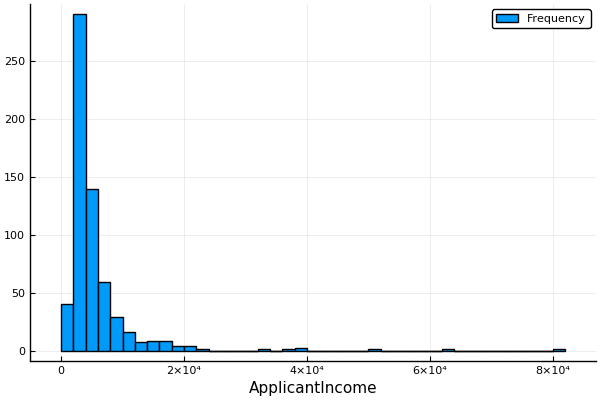

In [11]:
 Plots.histogram((train[:ApplicantIncome]),bins=50,xlabel="ApplicantIncome",labels="Frequency")                       #Plot histogram

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[12]:1
└ @ Core In[12]:1


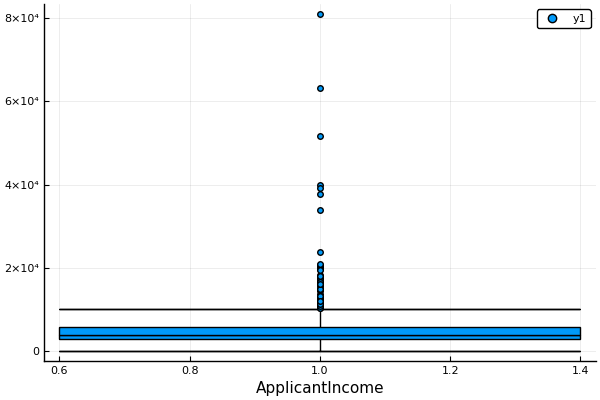

In [12]:
 Plots.boxplot((train[:ApplicantIncome]), xlabel="ApplicantIncome")


┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[13]:1
└ @ Core In[13]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[13]:1
└ @ Core In[13]:1


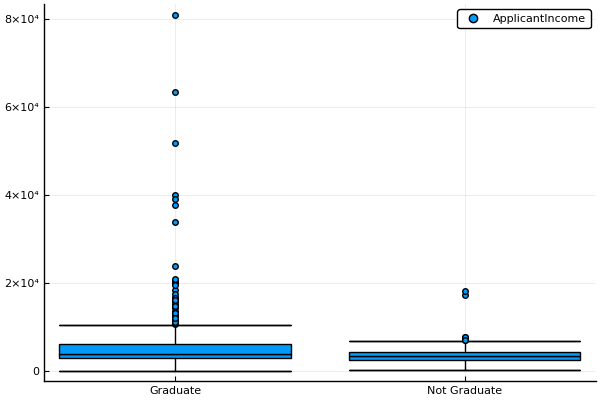

In [13]:
Plots.boxplot(train[:Education],train[:ApplicantIncome],labels="ApplicantIncome")

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[14]:1
└ @ Core In[14]:1


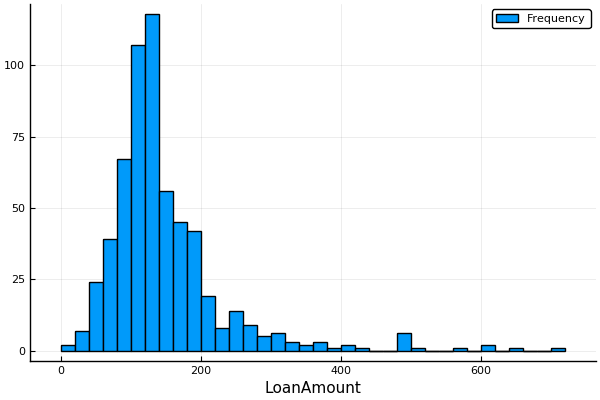

In [14]:
 Plots.histogram((train[:LoanAmount]),bins=50,xlabel="LoanAmount",labels="Frequency")

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[15]:2
└ @ Core In[15]:2


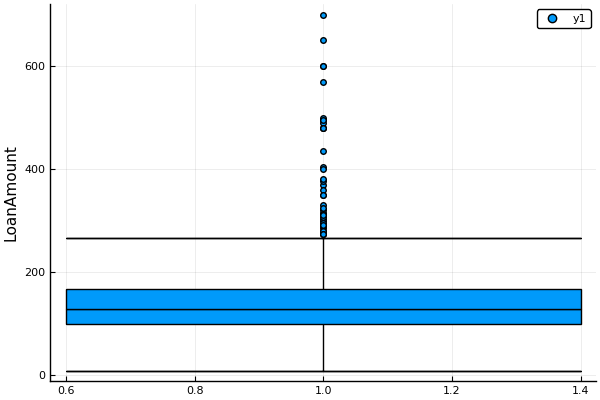

In [15]:
x=dropmissing(train,:LoanAmount)

Plots.boxplot((x[:LoanAmount]), ylabel="LoanAmount")

In [16]:
showcols(train)

┌ Warning: `showcols(df::AbstractDataFrame, all::Bool=false, values::Bool=true)` is deprecated, use `describe(df, :eltype, :nmissing, :first, :last)` instead.
│   caller = showcols(::DataFrame) at deprecated.jl:56
└ @ DataFrames ./deprecated.jl:56


,variable,eltype,nmissing,first,last
,Symbol,DataType,Int64,Any,Any
1,Loan_ID,String,0,LP001002,LP002990
2,Gender,String,13,Male,Female
3,Married,String,3,No,No
4,Dependents,String,15,0,0
5,Education,String,0,Graduate,Graduate
6,Self_Employed,String,32,No,Yes
7,ApplicantIncome,Int64,0,5849,4583
8,CoapplicantIncome,Float64,0,0.0,0.0
9,LoanAmount,Int64,22,missing,133


In [17]:
#replace missing loan amount with mean of loan amount
# train[isna.(train[:LoanAmount]),:LoanAmount] = floor(mean(dropna(train[:LoanAmount])))
# impute(train[:LoanAmount],:fill;limit=0.75)

## Data Imputation
#### Filling missing values and 0.0 in LoanAmount with mean

In [18]:
train[ismissing.(train[:LoanAmount]),:LoanAmount]=floor(mean(dropmissing(train)[:LoanAmount]))
train[train[:LoanAmount] .== 0, :LoanAmount] = floor(mean(dropmissing(train)[:LoanAmount]))


┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[18]:1
└ @ Core In[18]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[18]:1
└ @ Core In[18]:1
┌ Warning: implicit broadcasting in setindex! is deprecated; use `df[row_inds, col_ind] .= Ref(v)` broadcasting assignment to change the column in place
│   caller = setindex!(::DataFrame, ::Float64, ::BitArray{1}, ::Symbol) at deprecated.jl:1503
└ @ DataFrames /home/jismysebastian/.julia/packages/DataFrames/GoFnP/src/deprecated.jl:1503
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[18]:2
└ @ Core In[18]:2
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[18]:2
└ @ Core In[18]:2


144.0

#### replace missing gender, married, dependents, self employed , loan term and credit history columns with mode of gender values

In [19]:
train[ismissing.(train[:Gender]), :Gender] = mode(dropmissing(train)[:Gender])
train[ismissing.(train[:Married]),:Married] = mode(dropmissing(train)[:Married ])
train[ismissing.(train[:Dependents]),:Dependents]= mode(dropmissing(train)[:Dependents])
train[ismissing.(train[:Self_Employed]),:Self_Employed]= mode(dropmissing(train)[:Self_Employed])
train[ismissing.(train[:Loan_Amount_Term]),:Loan_Amount_Term]= mode(dropmissing(train)[:Loan_Amount_Term])
train[ismissing.(train[:Credit_History]),:Credit_History]= mode(dropmissing(train)[:Credit_History])

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[19]:1
└ @ Core In[19]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[19]:1
└ @ Core In[19]:1
┌ Warning: implicit broadcasting in setindex! is deprecated; use `df[row_inds, col_ind] .= Ref(v)` broadcasting assignment to change the column in place
│   caller = setindex!(::DataFrame, ::String, ::BitArray{1}, ::Symbol) at deprecated.jl:1503
└ @ DataFrames /home/jismysebastian/.julia/packages/DataFrames/GoFnP/src/deprecated.jl:1503
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[19]:2
└ @ Core In[19]:2
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[19]:2
└ @ Core In[19]:2
┌ Warning:

1

### Imputing test data

In [20]:
test[ismissing.(test[:LoanAmount]),:LoanAmount]=floor(mean(dropmissing(test)[:LoanAmount]))
test[test[:LoanAmount] .== 0, :LoanAmount] = floor(mean(dropmissing(test)[:LoanAmount]))
test[ismissing.(test[:Gender]), :Gender] = mode(dropmissing(test)[:Gender])
test[ismissing.(test[:Married]),:Married] = mode(dropmissing(test)[:Married ])
test[ismissing.(test[:Dependents]),:Dependents]= mode(dropmissing(test)[:Dependents])
test[ismissing.(test[:Self_Employed]),:Self_Employed]= mode(dropmissing(test)[:Self_Employed])
test[ismissing.(test[:Loan_Amount_Term]),:Loan_Amount_Term]= mode(dropmissing(test)[:Loan_Amount_Term])
test[ismissing.(test[:Credit_History]),:Credit_History]= mode(dropmissing(test)[:Credit_History])

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[20]:1
└ @ Core In[20]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[20]:1
└ @ Core In[20]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[20]:2
└ @ Core In[20]:2
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[20]:2
└ @ Core In[20]:2
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[20]:3
└ @ Core In[20]:3
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[20]:3
└ @ Core In[20]:3
┌ Warning: `getindex(d

1

In [34]:
 using ScikitLearn 
 @sk_import preprocessing: LabelEncoder 
 labelencoder = LabelEncoder() 
 categories = [2 3 4 5 6 12 13] 
 
for col in categories 
     train[col] = fit_transform!(labelencoder, train[col]) 
    if col<=length(test) 
    test[col]= fit_transform!(labelencoder,test[col])
    end
 end

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[34]:7
└ @ Core ./In[34]:7
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[34]:7
└ @ Core ./In[34]:7
┌ Warning: `length(df::AbstractDataFrame)` is deprecated, use `size(df, 2)` instead.
│   caller = top-level scope at In[34]:8
└ @ Core ./In[34]:8
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[34]:9
└ @ Core ./In[34]:9
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[34]:9
└ @ Core ./In[34]:9


In [22]:
 using ScikitLearn: fit!, predict, @sk_import, fit_transform! 
 @sk_import preprocessing: LabelEncoder 
 @sk_import model_selection: cross_val_score  
 @sk_import metrics: accuracy_score 
 @sk_import linear_model: LogisticRegression 
 @sk_import ensemble: RandomForestClassifier 
 @sk_import tree: DecisionTreeClassifier 

┌ Warning: Module model_selection has been ported to Julia - try `import ScikitLearn: CrossValidation` instead
└ @ ScikitLearn.Skcore /home/jismysebastian/.julia/packages/ScikitLearn/bo2Pt/src/Skcore.jl:140


PyObject <class 'sklearn.tree.tree.DecisionTreeClassifier'>

In [23]:

 function classification_model(model, predictors) 
     y = convert(Array, train[:13]) 
     X = convert(Array, train[predictors]) 
     X2 = convert(Array, test[predictors])                  
     
    #Fit the model: 
     fit!(model, X, y) 

     #Make predictions on training set: 
     predictions = predict(model, X) 

     #Print accuracy 
     accuracy = accuracy_score(predictions, y) 
     println("\naccuracy: ",accuracy) 

     #5 fold cross validation 
     cross_score = cross_val_score(model, X, y, cv=5)    
 
     #print cross_val_score 
     println("cross_validation_score: ", mean(cross_score)) 

     #return predictions 
     fit!(model, X, y) 
     pred = predict(model, X2) 
     return pred 
 end

classification_model (generic function with 1 method)

In [24]:
model = LogisticRegression()
predictor_var = [:Credit_History]
classification_model(model, predictor_var)

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = classification_model(::PyCall.PyObject, ::Array{Symbol,1}) at In[23]:3
└ @ Main ./In[23]:3
┌ Warning: `getindex(df::DataFrame, col_inds::Union{AbstractVector, Regex, Not})` is deprecated, use `df[:, col_inds]` instead.
│   caller = classification_model(::PyCall.PyObject, ::Array{Symbol,1}) at In[23]:4
└ @ Main ./In[23]:4
┌ Warning: `convert(::Type{Array}, df::AbstractDataFrame)` is deprecated, use `convert(Matrix, df)` instead.
│   caller = classification_model(::PyCall.PyObject, ::Array{Symbol,1}) at In[23]:4
└ @ Main ./In[23]:4
┌ Warning: `getindex(df::DataFrame, col_inds::Union{AbstractVector, Regex, Not})` is deprecated, use `df[:, col_inds]` instead.
│   caller = classification_model(::PyCall.PyObject, ::Array{Symbol,1}) at In[23]:5
└ @ Main ./In[23]:5
┌ Warning: `convert(::Type{Array}, df::AbstractDataFrame)` is deprecated, use `convert(Matrix, df)` instead.
│   ca


accuracy: 0.8094462540716613
cross_validation_score: 0.8095716552088842


367-element Array{Int64,1}:
 1
 1
 1
 1
 1
 1
 1
 0
 1
 1
 1
 1
 1
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

In [37]:
predictor_var = [:Credit_History, :Education, :Married, :Self_Employed, :Property_Area]
classification_model(model, predictor_var)


accuracy: 0.8094462540716613
cross_validation_score: 0.8095716552088842


367-element Array{Int64,1}:
 1
 1
 1
 1
 1
 1
 1
 0
 1
 1
 1
 1
 1
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

In [42]:
model = DecisionTreeClassifier()
predictor_var = [:Credit_History, :Gender, :Married, :Education]
classification_model(model, predictor_var)



accuracy: 0.8094462540716613
cross_validation_score: 0.8095716552088842


367-element Array{Int64,1}:
 1
 1
 1
 1
 1
 1
 1
 0
 1
 1
 1
 1
 1
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

In [44]:
#We can try different combinations of variables:
predictor_var = [:Credit_History, :Education, :Married, :Self_Employed, :Property_Area]
classification_model(model, predictor_var)


accuracy: 0.8094462540716613
cross_validation_score: 0.7819672131147541


367-element Array{Int64,1}:
 1
 1
 1
 1
 1
 1
 1
 0
 1
 1
 1
 1
 1
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 0

In [45]:
model = RandomForestClassifier(n_estimators=100)
predictors =[:Gender, :Married, :Dependents, :Education,
 :Self_Employed, :Loan_Amount_Term, :Credit_History, :Property_Area,
 :LoanAmount]
classification_model(model, predictors)


accuracy: 0.9869706840390879
cross_validation_score: 0.7606821787414066


367-element Array{Int64,1}:
 0
 1
 1
 0
 0
 0
 1
 0
 1
 1
 0
 0
 1
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 0
 0
 1

In [47]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=8, n_jobs=-1)
predictors = [:ApplicantIncome, :CoapplicantIncome, :LoanAmount, :Credit_History, :Loan_Amount_Term, :Gender, :Dependents]
classification_model(model, predictors)


accuracy: 0.8241042345276873
cross_validation_score: 0.8047065044949762


367-element Array{Int64,1}:
 1
 1
 1
 1
 1
 1
 1
 0
 1
 1
 1
 1
 1
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

In [50]:
pred = map(x-> if x==1 "Y" else "N" end, lrpred)  #Convert to "Y" and "N" 
outdf = DataFrame(Loan_ID=test[:Loan_ID], Loan_Status=pred)
writetable("sub.csv", outdf)

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[50]:2
└ @ Core In[50]:2
┌ Warning: writetable is deprecated, use CSV.write from the CSV package instead
│   caller = top-level scope at In[50]:3
└ @ Core In[50]:3


MethodError: MethodError: no method matching printtable(::IOStream, ::DataFrame; header=true, separator=',', quotemark='"', nastring="NA")
Closest candidates are:
  printtable(::IO, ::AbstractDataFrame; header, separator, quotemark, missingstring) at /home/jismysebastian/.julia/packages/DataFrames/GoFnP/src/abstractdataframe/io.jl:338 got unsupported keyword argument "nastring"